In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch.autograd import Variable

from utils import plot_omniglot_pairs
from data_loader import get_train_valid_loader, get_test_loader

%load_ext autoreload
%autoreload 2

In [2]:
data_dir = './data/'
batch_size = 32

In [3]:
train_loader, valid_loader = get_train_valid_loader(data_dir, batch_size, False)
test_loader = get_test_loader(data_dir)

In [4]:
print("Train: {:,}".format(len(train_loader.dataset)))
print("Valid: {:,}".format(len(valid_loader.dataset)))
print("Test: {:,}".format(len(test_loader.dataset)))

Train: 10
Valid: 28
Test: 400


x: (2, 2, 105, 105, 1)
y: (2, 1)


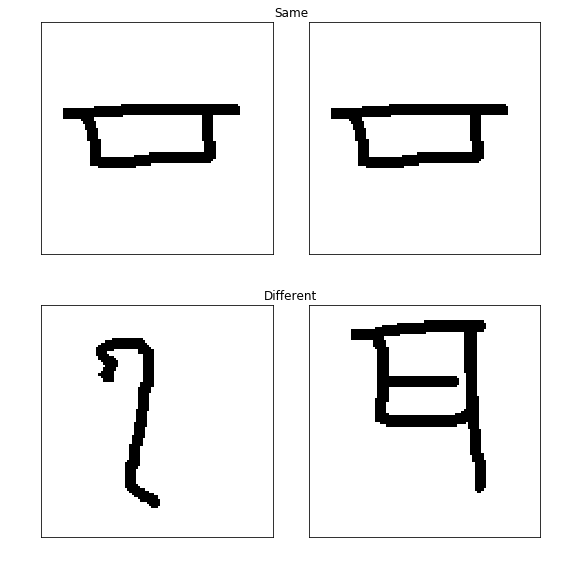

In [5]:
x, y = next(iter(train_loader))

# grab 2 pairs
x = x[0:2, :]
y = y[0:2]

x = x.numpy()
x = np.transpose(x, (0, 1, 3, 4, 2))

y = y.numpy()

print("x: {}".format(x.shape))
print("y: {}".format(y.shape))

plot_omniglot_pairs(x, y)

In [5]:
x, y = next(iter(test_loader))


 7
[torch.FloatTensor of size 1]



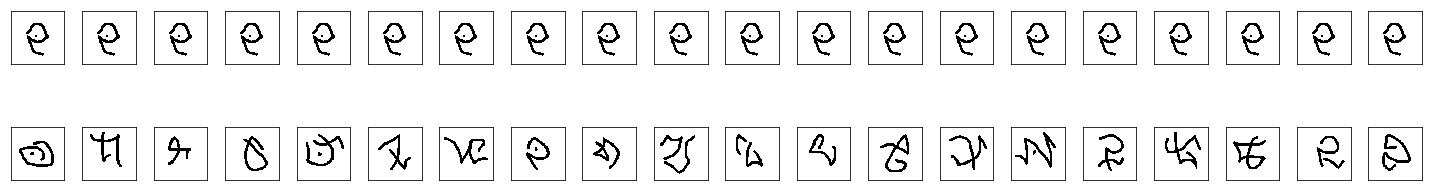

In [7]:
x = x.squeeze(0)
y = y.squeeze(0)

print(y)

plt.figure(figsize=(20, 4))

n = len(x)

for i in range(n):
    sample = x[i]
    sample = sample.numpy()
    sample = np.transpose(sample, (0, 2, 3, 1))

    # display left
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample[0].squeeze())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display right
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sample[1].squeeze())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()